# Tutorial 5.1: Synaptic Responses to Changes in Inputsx
## Neuroscience goal
- understand contrasting effects of synaptic depression and facilitation on steady-state and transient responses of synapses to changes in presynaptic rates
## Computational goal
- gain more practice with time-varying Poisson process
- combine multiple variables with stepwise changes and continuous variation in coupled ODEs

### Overview
- will treat spike train of a presynaptic neuron as a Poisson process whose emission rate will change stepwise at discrete times
- will examine synaptic response to these inputs first in a synapse without short-term changes in efficacy
- second in a synapse with synaptic depression
- finally in a synapse with synaptic facilitation
- simulate response of a postsynaptic LIF neuron to these inputs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### a. produce time vector
### b. produce vector with presynaptic rates of 20/100/10/50Hz for each 1-s portion

Text(0.5, 1.0, 'presynaptic firing rates')

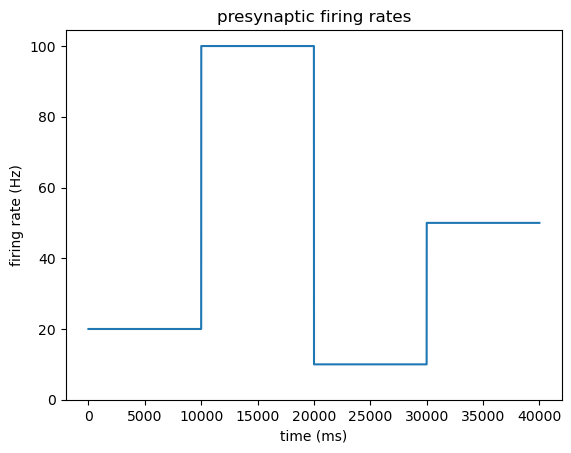

In [15]:
dt = 1e-4
t = np.arange(0, 4, dt)
presyn_hz = np.zeros_like(t)
quarter = int(len(t) / 4)

presyn_hz[:quarter] = 20
presyn_hz[quarter:quarter*2] = 100
presyn_hz[quarter*2:quarter*3] = 10
presyn_hz[quarter*3:] = 50

# verify presynaptic firing rate vector
plt.plot(presyn_hz)
plt.ylim(0)
plt.xlabel('time (ms)')
plt.ylabel('firing rate (Hz)')
plt.title('presynaptic firing rates')


### c. produce array of ones and zeros representing Poisson spike train
- such that probability of spike in any time bin of size $\delta t$ is equal to $\delta t \times r(t)$ where $r(t)$ is firing rate at the time-bin generated in b
- ignore possibility of multiple spikes in a time-bin

In [25]:
p_spike = presyn_hz * dt
spike_train = np.random.rand(len(t)) < p_spike

182

### d. produce synaptic conductance vector
- $G_{syn} (t)$, which increments by $\Delta G = 1nS$ when each spike arrives and decays back to zero between spikes with a time constant of 100ms
- plot $G_{syn}$ against time

In [33]:
delta_g = 1e-9
tau = 0.1

g_syn = np.zeros_like(t)

for i in range(1, len(t)):
    # decay conductance
    g_syn[i] = g_syn[i - 1] * np.exp(-dt / tau)

    # increase if spike
    if spike_train[i] == 1:
        g_syn[i] += delta_g

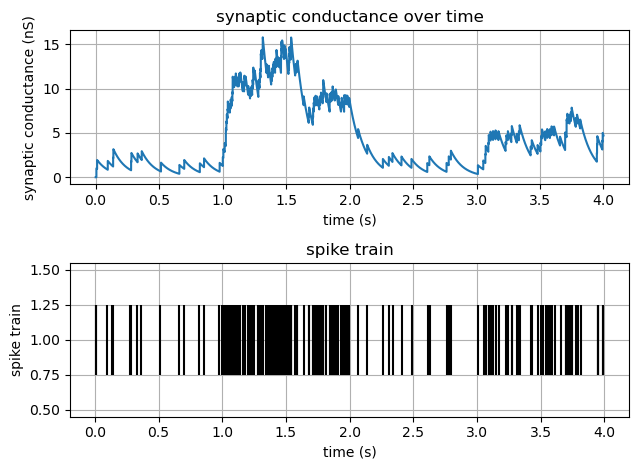

In [76]:
plt.subplot(2, 1, 1)
plt.plot(t, g_syn * 1e9)
plt.title('synaptic conductance over time')
plt.xlabel('time (s)')
plt.ylabel('synaptic conductance (nS)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.eventplot(t[spike_train], color='k', linelengths=0.5)
plt.ylabel('spike train')
plt.title('spike train')
plt.xlabel('time (s)')
plt.grid(True)

plt.tight_layout()

### e. produce synaptic depression vector
- assume initial release probability of $p0 = 0.5$ and produce depression vector, $D(t)$
    - initialized to 1
    - decreased by an amount $p0D(t)$ following each spike at time $t$
    - recovers via $(dD(t))/dt = (1 - D(t))/\tau_D$ with time constant of $\tau_D = 0.25s$

In [37]:
tau = 0.25
p0 = 0.5

depression = np.ones_like(t)

for i in range(1, len(t)):
    # recover
    dd_dt = (1 - depression[i - 1]) / tau
    depression[i] = depression[i - 1] + dd_dt * dt

    # decrease if spike
    if spike_train[i] == 1:
        depression[i] -= p0*depression[i]


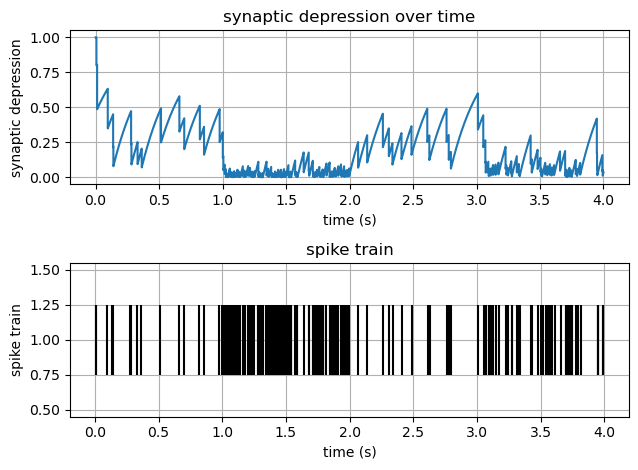

In [75]:
plt.subplot(2, 1, 1)
plt.plot(t, depression)
plt.title('synaptic depression over time')
plt.xlabel('time (s)')
plt.ylabel('synaptic depression')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.eventplot(t[spike_train], color='k', linelengths=0.5)
plt.title('spike train')
plt.ylabel('spike train')
plt.ytic
plt.xlabel('time (s)')
plt.grid(True)

plt.tight_layout()

### f. produce a second synaptic conductance vector
- with decay time constant of 0.1s that increments by $\Delta G = \Delta G_{max}p0D(t\_)$ following each spike at time $t$
    - where $\Delta G_{max} = 5nS$, $p0 = 0.5$ and $D(t)$ is obtained from (*e*)
    - $t\_$ indicates time immediately preceding the spike
    - plot the conductance against time

In [69]:
delta_g_max = 5e-9
tau = 0.1
p0 = 0.5

g_syn2 = np.zeros_like(t)

for i in range(1, len(t)):
    # decay conductance
    g_syn2[i] = g_syn2[i - 1] * np.exp(-dt / tau)

    # increase if spike
    if spike_train[i] == 1:
        g_syn2[i] += delta_g_max * p0 * depression[i - 1]

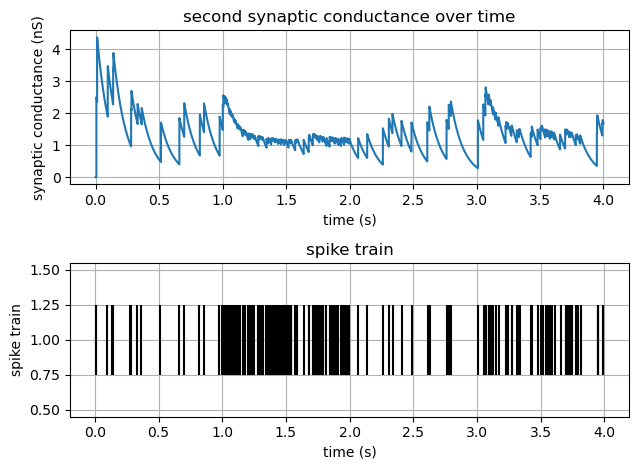

In [77]:
plt.subplot(2, 1, 1)
plt.plot(t, g_syn2 * 1e9)
plt.title('second synaptic conductance over time')
plt.xlabel('time (s)')
plt.ylabel('synaptic conductance (nS)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.eventplot(t[spike_train], color='k', linelengths=0.5)
plt.ylabel('spike train')
plt.title('spike train')
plt.xlabel('time (s)')
plt.grid(True)

plt.tight_layout()

### g. produce synaptic facilitation vector
- assume initial release probability of $p0 = 0.2$ and produce synaptic facilitation vector $F(t)$
    - initialized to 1
    - increases by amount $f_{fac}(F_{max} - F(t\_))$ following spike at time $t$
    - recovers via $(dF(t)) / dt = (1 - F(t)) / \tau_F$ with 
        - time constant $\tau_F$ = 0.25s
        - facilitation factor $f_{fac} = 0.25$
        - maximum facilitation $F_{max} = 1 / p0$

In [48]:
tau = 0.25
p0 = 0.2
f_fac = 0.25
f_max = (1 / p0)

facilitation = np.ones_like(t)

for i in range(1, len(t)):
    # recover
    df_dt = (1 - facilitation[i - 1]) / tau
    facilitation[i] = facilitation[i - 1] + df_dt*dt

    # except spike
    if spike_train[i] == 1:
        facilitation[i] += f_fac * (f_max - facilitation[i - 1])

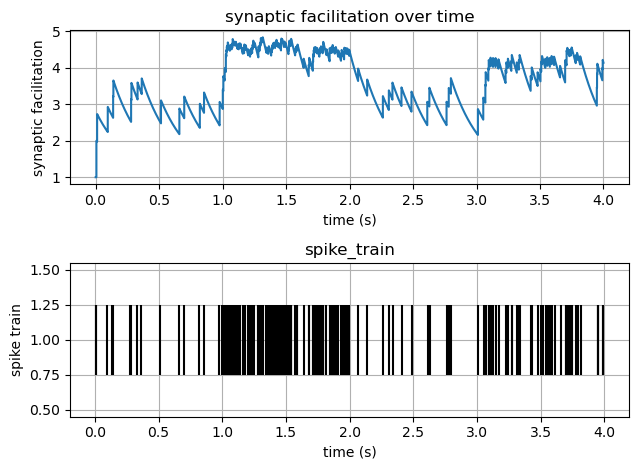

In [78]:
plt.subplot(2, 1, 1)
plt.plot(t, facilitation)
plt.title('synaptic facilitation over time')
plt.xlabel('time (s)')
plt.ylabel('synaptic facilitation')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.eventplot(t[spike_train], color='k', linelengths=0.5)
plt.ylabel('spike train')
plt.title('spike_train')
plt.xlabel('time (s)')
plt.grid(True)

plt.tight_layout()

### h. produce new synaptic depression vector
- initialize to one
- decreases by $p0F(t\_)D(t\_)$ following each spike
- recover same as (*e*)
- p0 = 0.2
- $F(t)$ generated in (*g*)

In [62]:
p0 = 0.2
tau = 0.25

depression = np.ones_like(t)

for i in range(1, len(t)):
    # recover
    dd_dt = (1 - depression[i - 1]) / tau
    depression[i] = depression[i - 1] + dd_dt * dt

    # decrease if spike
    if spike_train[i] == 1:
        depression[i] -= p0 * depression[i - 1] * facilitation[i - 1]


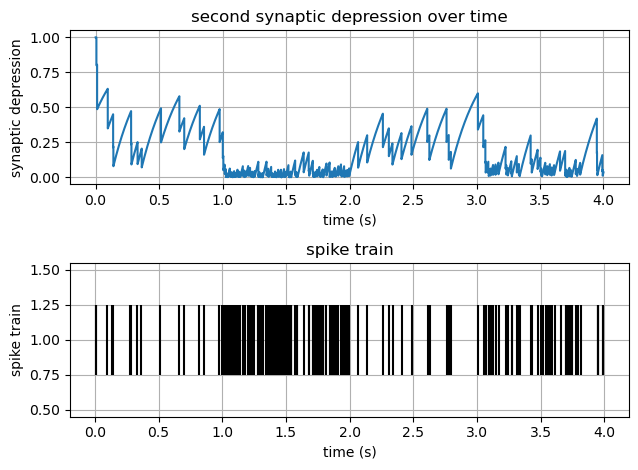

In [79]:
plt.subplot(2, 1, 1)
plt.plot(t, depression)
plt.title('second synaptic depression over time')
plt.xlabel('time (s)')
plt.ylabel('synaptic depression')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.eventplot(t[spike_train], color='k', linelengths=0.5)
plt.ylabel('spike train')
plt.title('spike train')
plt.xlabel('time (s)')
plt.grid(True)

plt.tight_layout()

### i. produce third synaptic conductance vector 
- decay time constant of 0.1s, increments by $\Delta G = \Delta G_{max}p0F(t\_)D(t\_)$ following each spike
- $\Delta G_{max} = 4nS$
- p0 = 0.2
- $F(t)$ and $D(t)$ obtained above
- plot conductance vs time 


In [90]:
tau = 0.1
p0 = 0.2
delta_g_max = 4e-9

g_syn3 = np.zeros_like(t)

for i in range(1, len(t)):
    # decay
    g_syn3[i] = g_syn3[i - 1] * np.exp(-dt / tau)

    # increase if spike
    if spike_train[i] == 1:
        g_syn3[i] += delta_g_max * p0 * depression[i - 1] * facilitation[i - 1]


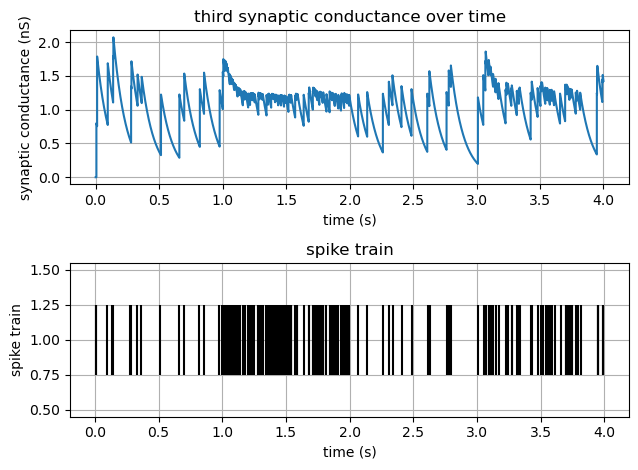

In [107]:
plt.subplot(2, 1, 1)
plt.plot(t, g_syn3 * 1e9)
plt.title('third synaptic conductance over time')
plt.xlabel('time (s)')
plt.ylabel('synaptic conductance (nS)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.eventplot(t[spike_train], color='k', linelengths=0.5)
plt.ylabel('spike train')
plt.title('spike train')
plt.xlabel('time (s)')
plt.grid(True)

plt.tight_layout()

## Comment
- 100ms is a long synaptic time constant, but necessary in the simplified model to see accumulation of inputs from single spike train
- to observe this accumulation, have assumed that postsynaptic receptors are never completely saturated by neurotransmitter
- BUT, this is unlikely when neurotransmitter is released at a high rate and time constant for dissociation and closing of channels is as high as 100ms

- to include effects of such saturation, the update term should be replaced
    - for example, in (*i*), by $\Delta G = (G_{max} - G_{syn})p0F(t\_)D(t\_)$

In [109]:
tau = 0.1
p0 = 0.2
g_max = 4e-9

g_syn4 = np.zeros_like(t)

for i in range(1, len(t)):
    # decay
    g_syn4[i] = g_syn4[i - 1] * np.exp(-dt / tau)

    # increase if spike
    if spike_train[i] == 1:
        delta_g = (g_max - g_syn4[i - 1]) * p0 * depression[i - 1] * facilitation[i - 1]
        g_syn4[i] += delta_g


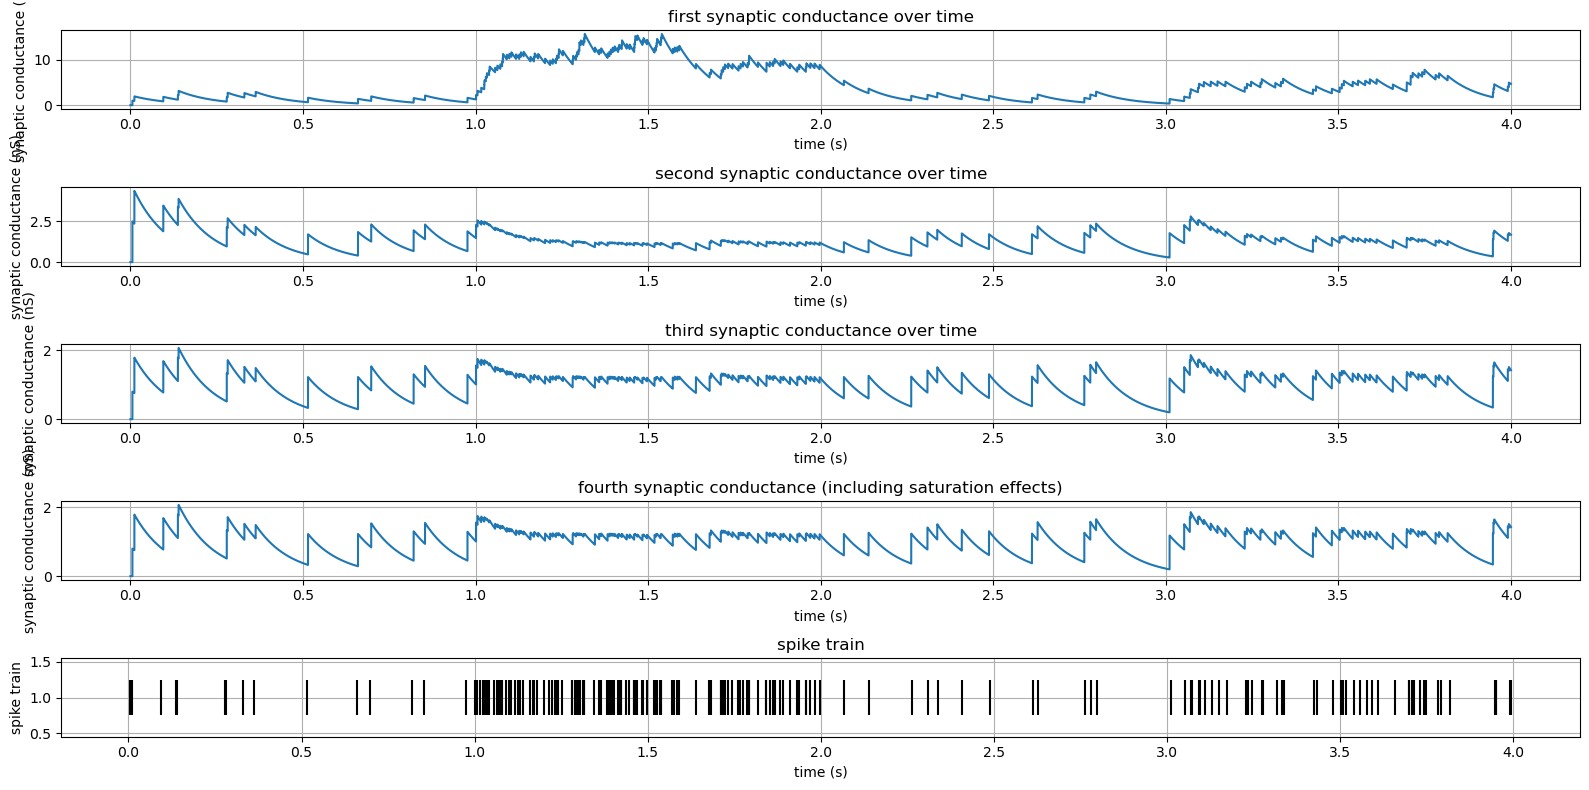

In [110]:
plt.figure(figsize=(16, 8))

plt.subplot(5, 1, 1)
plt.plot(t, g_syn * 1e9)
plt.title('first synaptic conductance over time')
plt.xlabel('time (s)')
plt.ylabel('synaptic conductance (nS)')
plt.grid(True)

plt.subplot(5, 1, 2)
plt.plot(t, g_syn2 * 1e9)
plt.title('second synaptic conductance over time')
plt.xlabel('time (s)')
plt.ylabel('synaptic conductance (nS)')
plt.grid(True)

plt.subplot(5, 1, 3)
plt.plot(t, g_syn3 * 1e9)
plt.title('third synaptic conductance over time')
plt.xlabel('time (s)')
plt.ylabel('synaptic conductance (nS)')
plt.grid(True)

plt.subplot(5, 1, 4)
plt.plot(t, g_syn4 * 1e9)
plt.title('fourth synaptic conductance (including saturation effects)')
plt.xlabel('time (s)')
plt.ylabel('synaptic conductance (nS)')
plt.grid(True)

plt.subplot(5, 1, 5)
plt.eventplot(t[spike_train], color='k', linelengths=0.5)
plt.ylabel('spike train')
plt.title('spike train')
plt.xlabel('time (s)')
plt.grid(True)

plt.tight_layout()

### comment (cont.)
- alternatively, can assume time-varying stimulus impacts a neuron via multiple synaptic inputs
- in option A, will simulate fifty inputs via synapses with a 2ms time constant: short enough synaptic decay that saturation can be neglected

# Challenge problems
## Option A
### j. 
- initialize new total conductance vector 
- using for loop, repeat (*c*)-(*d*) 50 times, each time using a new Poisson spike train
- make the alteration of a 2ms time constant for decay of synaptic conductance
- within the loop, accumulate total conductance at each point in time by summing across the values generated for that time point by each of the fifty input vectors
- plot summed vector and compare with the one plotted in (*d*)

In [125]:
# initialize time vector
dt = 1e-4
t = np.arange(0, 4, dt)

# new total conductance vector
total_conductance = np.zeros_like(t)
delta_g = 1e-9
tau = 0.002


for _ in range(50):
    # new spike train each loop
    spike_train = np.random.rand(len(t)) < presyn_hz * dt
    # new conductance vector each loop
    g = np.zeros_like(t)
    
    for i in range(1, len(t)):
        # decay 
        g[i] = g[i - 1] * np.exp(-dt / tau)

        # increase if spike
        if spike_train[i] == 1:
            g[i] += delta_g
    
    # accumulate total conductance    
    total_conductance += g

    

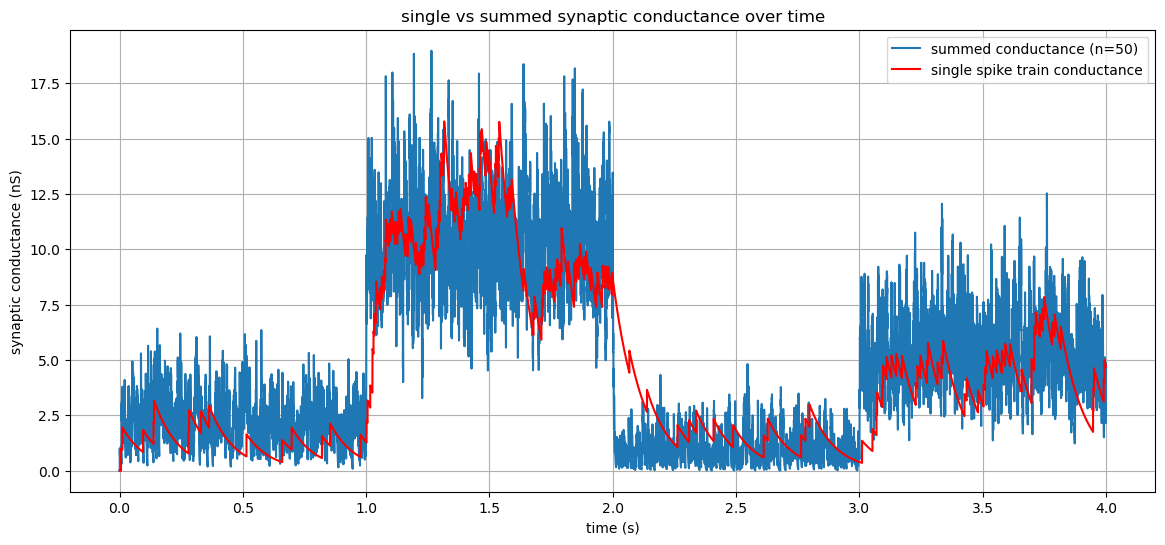

In [160]:
plt.figure(figsize=(14, 6))
plt.plot(t, total_conductance * 1e9, label='summed conductance (n=50)')
plt.plot(t, g_syn * 1e9, label='single spike train conductance', linewidth=1.5, color='r')
plt.title('single vs summed synaptic conductance over time')
plt.xlabel('time (s)')
plt.ylabel('synaptic conductance (nS)')
plt.legend()
plt.grid(True)